In [1]:
import os
import pandas as pd
import numpy as np
import re, operator
from operator import itemgetter

# stats

from scipy import stats
from scipy import special
from scipy.spatial.distance import cosine
from scipy.stats import zipf

# dataviz
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go


In [2]:
def zipfFit(fdist, name, toPlot=False, pr=False, ret=True):
    fsort_tuple = sorted(fdist.items(), key=operator.itemgetter(1),
    reverse=True)
    y_vals = np.array([t[1] for t in fsort_tuple])
    x_vals = np.array(range(1, len(y_vals) + 1))
    if toPlot:
        plt.title(name)
        plt.rcParams['figure.figsize'] = (50.0, 50.0)
        plt.plot([np.log(x) for x in x_vals], 
            [np.log(y) for y in y_vals], 'ro')
        plt.xlabel('log(rank)')
        plt.ylabel('log(count)')
        plt.show()
    slope, intercept, r_value, p_value, std_err = stats.linregress(
        np.log(x_vals.astype(float)),
        np.log(y_vals.astype(float)))
    if pr:
        print("log-log r-squared for " + name + ":", r_value**2)
    if ret:
        return([slope, intercept, r_value**2])

## Labels

### D2KAB

In [3]:
fcu_d2kab = pd.read_csv("../output/d2kab/fcu/fcu_d2kab.csv", delimiter="\t", encoding='utf-8')
fcu_d2kab[:3]

bsv  type  length  \
0  20180911_bsv_grandes_cultures-26_cle0f15a8  html   12959   
1  20180911_bsv_grandes_cultures-26_cle0f15a8  html   12959   
2  20180911_bsv_grandes_cultures-26_cle0f15a8  html   12959   

               context   word prefLabel            context.1 location  \
0           ACTUALITÉS  Colza     colza  Limaces à surveille    13-18   
1  es grosses altises.   Maïs      maïs   Compter les larves  151-155   
2  ion 12 parcelles de  colza     colza  sont renseignées ce  469-474   

                                            features  
0  type=GOL, uri=http://ontology.inrae.fr/frenchc...  
1  type=GOL, uri=http://ontology.inrae.fr/frenchc...  
2  type=GOL, uri=http://ontology.inrae.fr/frenchc...

In [4]:
fcu_d2kab['prefLabel'].describe()

count      9883
unique      173
top       vigne
freq       1072
Name: prefLabel, dtype: object

In [5]:
fcu_d2kab['bsv'].describe()

count                                                  9883
unique                                                  230
top       BSV_legumes_allium_pomme_de_terre_AURA_2019-14...
freq                                                    261
Name: bsv, dtype: object

In [6]:
counts_d2kab = fcu_d2kab['prefLabel'].value_counts()
dico_d2kab = counts_d2kab.to_dict()
dico_d2kab

{'vigne': 1072,
 'colza': 655,
 'chou': 407,
 'chou potager': 407,
 'blé': 384,
 'maïs': 377,
 'tomate': 346,
 'culture fruitière': 294,
 'arbuste à baies': 286,
 'carotte': 254,
 'culture légumière': 238,
 'pois': 235,
 'maraîchage': 219,
 'poireau': 204,
 'céréale à paille': 197,
 'céréale': 166,
 'tournesol': 164,
 'céleri': 164,
 'oignon': 154,
 'floriculture': 142,
 'salade': 140,
 'pommier': 135,
 'betterave': 133,
 'aubergine': 126,
 'blé tendre': 125,
 'pomme de terre': 119,
 'semence': 107,
 'orge': 100,
 'concombre': 100,
 'gel': 96,
 'lin': 83,
 'courgette': 76,
 'oranger': 74,
 'poirée': 71,
 'poivron': 70,
 'melon': 69,
 'blé dur': 62,
 'légume à graines ou à gousses': 60,
 'fraisier': 59,
 'haricot': 57,
 'laitue': 53,
 'oléagineux': 46,
 'courge': 46,
 'radis': 44,
 'soja': 44,
 'pois protéagineux de printemps': 43,
 'arboriculture fruitière': 42,
 'navet potager': 42,
 'vigne de cuve': 35,
 'chicorée endive': 35,
 'lin oléagineux': 34,
 'épinard': 31,
 'asperge': 30,
 '

In [7]:
features_d2kab = list(dico_d2kab.values()) 
true_labels_d2kab = list(dico_d2kab.keys())
freq_df = px.data.iris() 
fig = px.scatter(fcu_d2kab, x=true_labels_d2kab, y=features_d2kab)
fig.show()

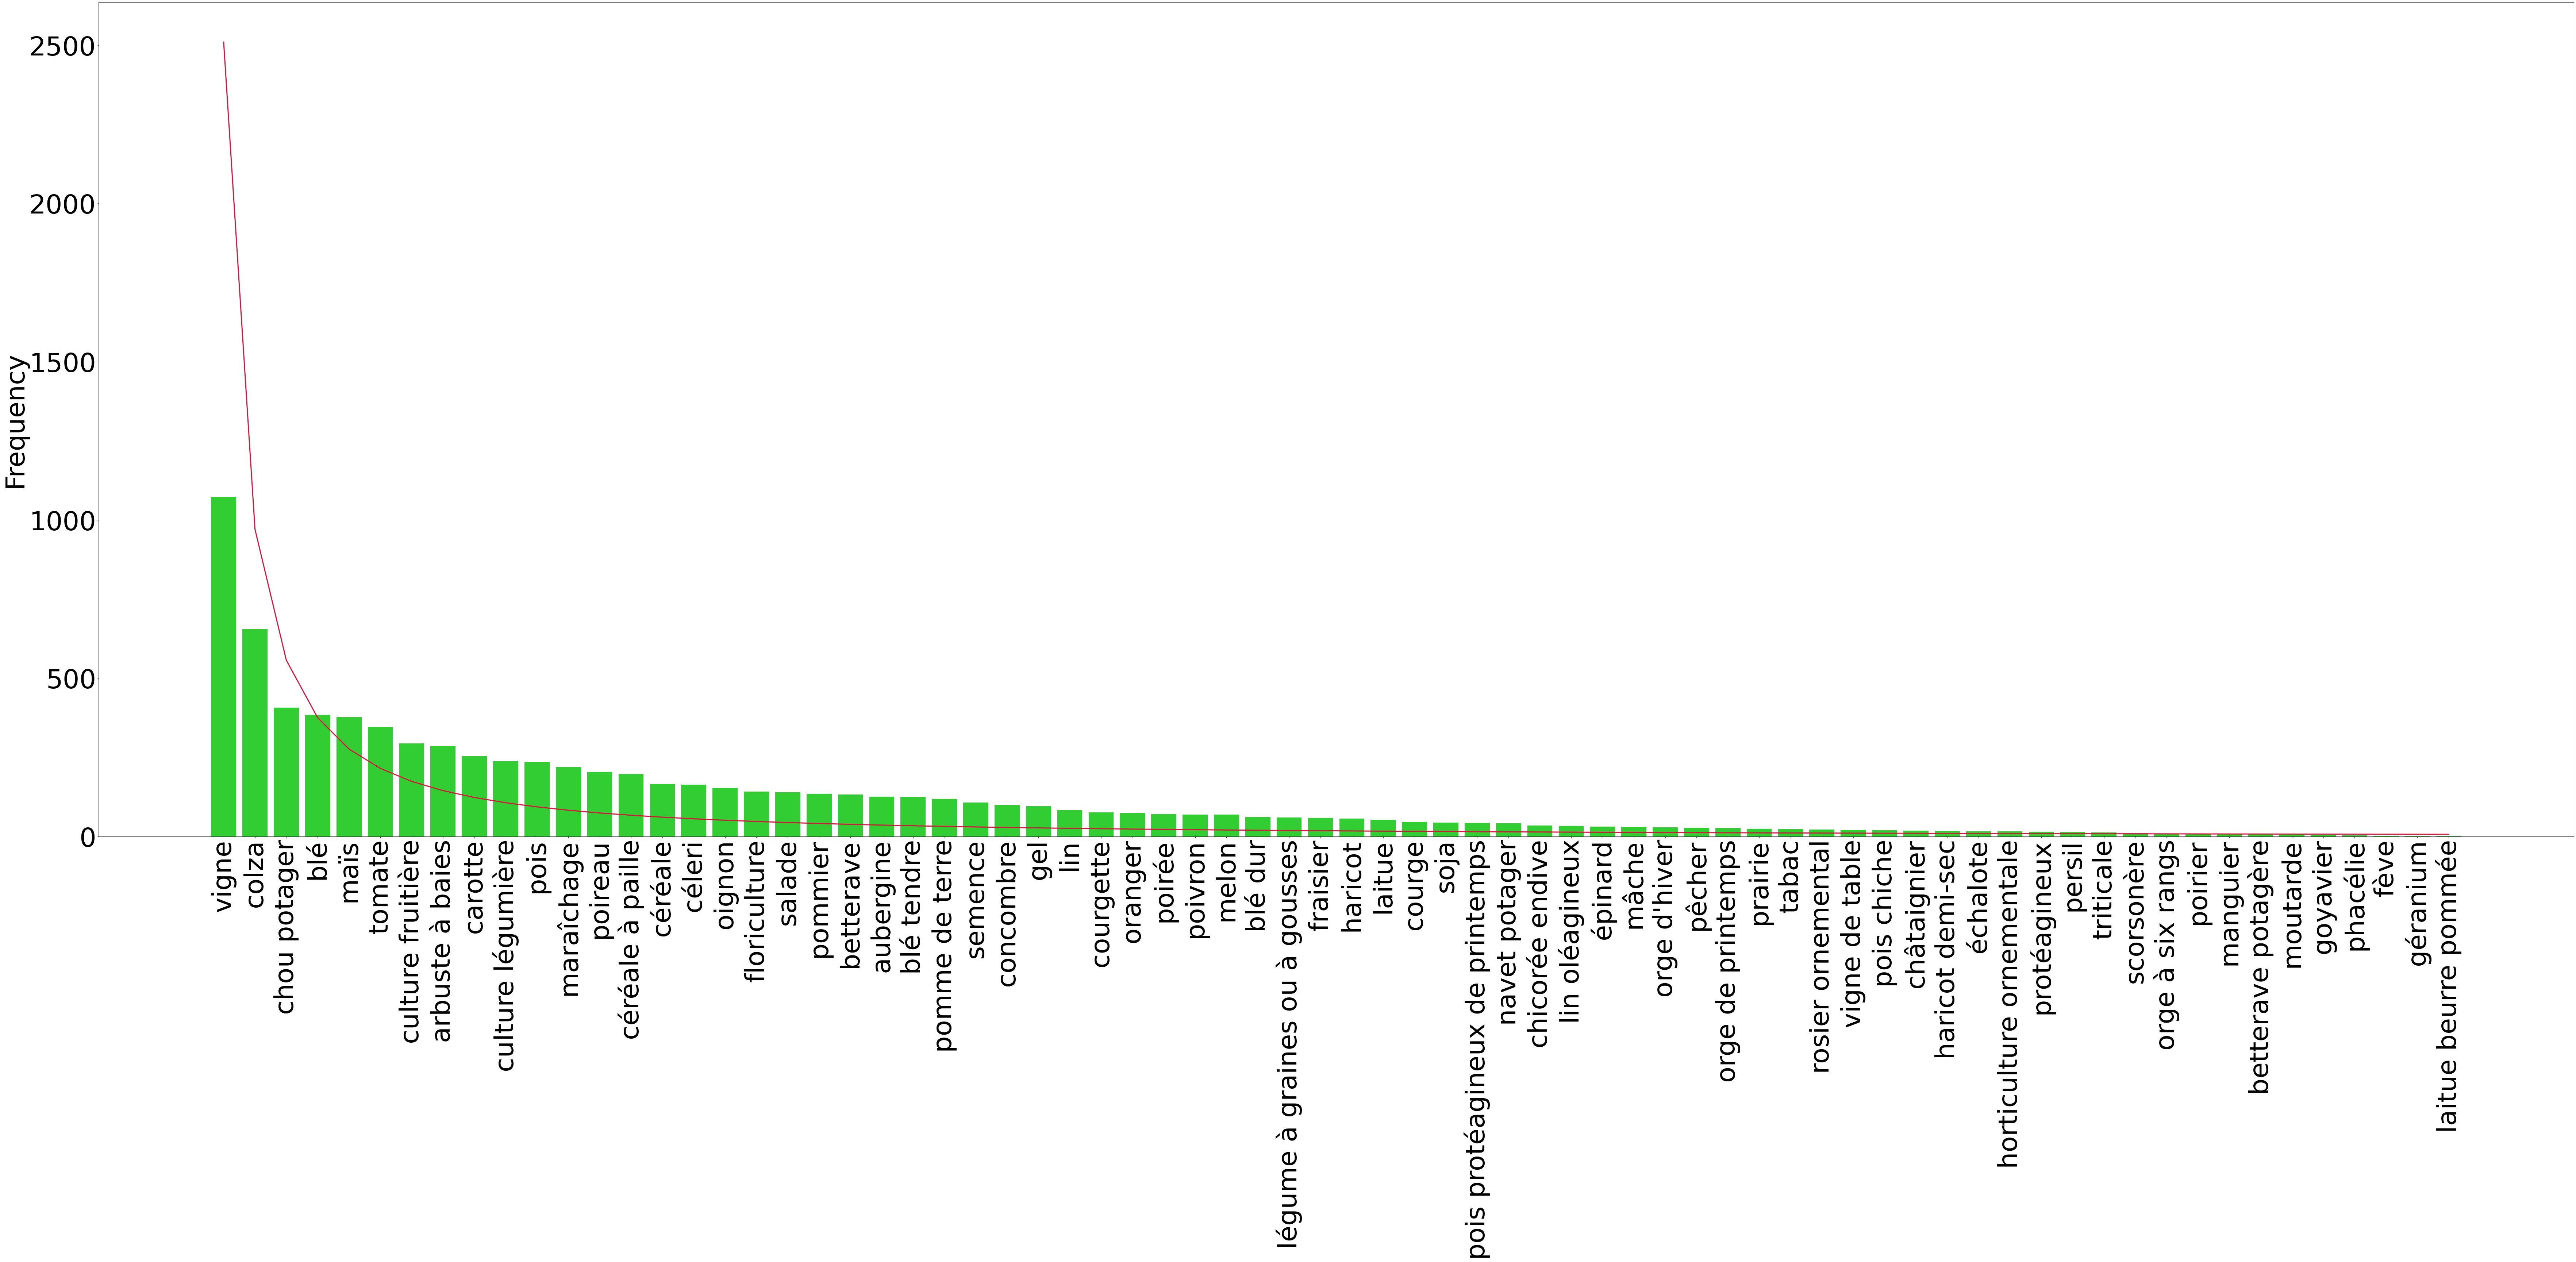

In [56]:
#zipf law :
#the most frequent word occurs twice as often as the second most frequent work
#three times as often as the subsequent word, and so on until the least frequent word

import matplotlib.pyplot as plt
from scipy.stats import zipf

inv_map = {v: k for k, v in counts_d2kab.items()}
lst = list(inv_map.items())

plt.bar([key for val, key in lst], [val for val, key in lst], color='limegreen')
alpha = 1.37065874
total = sum([p for p, c in lst])
plt.plot(range(len(lst)), [zipf.pmf(p, alpha) * total for p in range(1, len(lst) + 1)], color='crimson', lw=3)
plt.ylabel("Frequency")
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.rcParams["figure.figsize"] = (100,50)
plt.rcParams.update({'font.size': 72})
# plot has more area below the expected zipf curve in higher rank words, and inverse for those that are more important
plt.show()

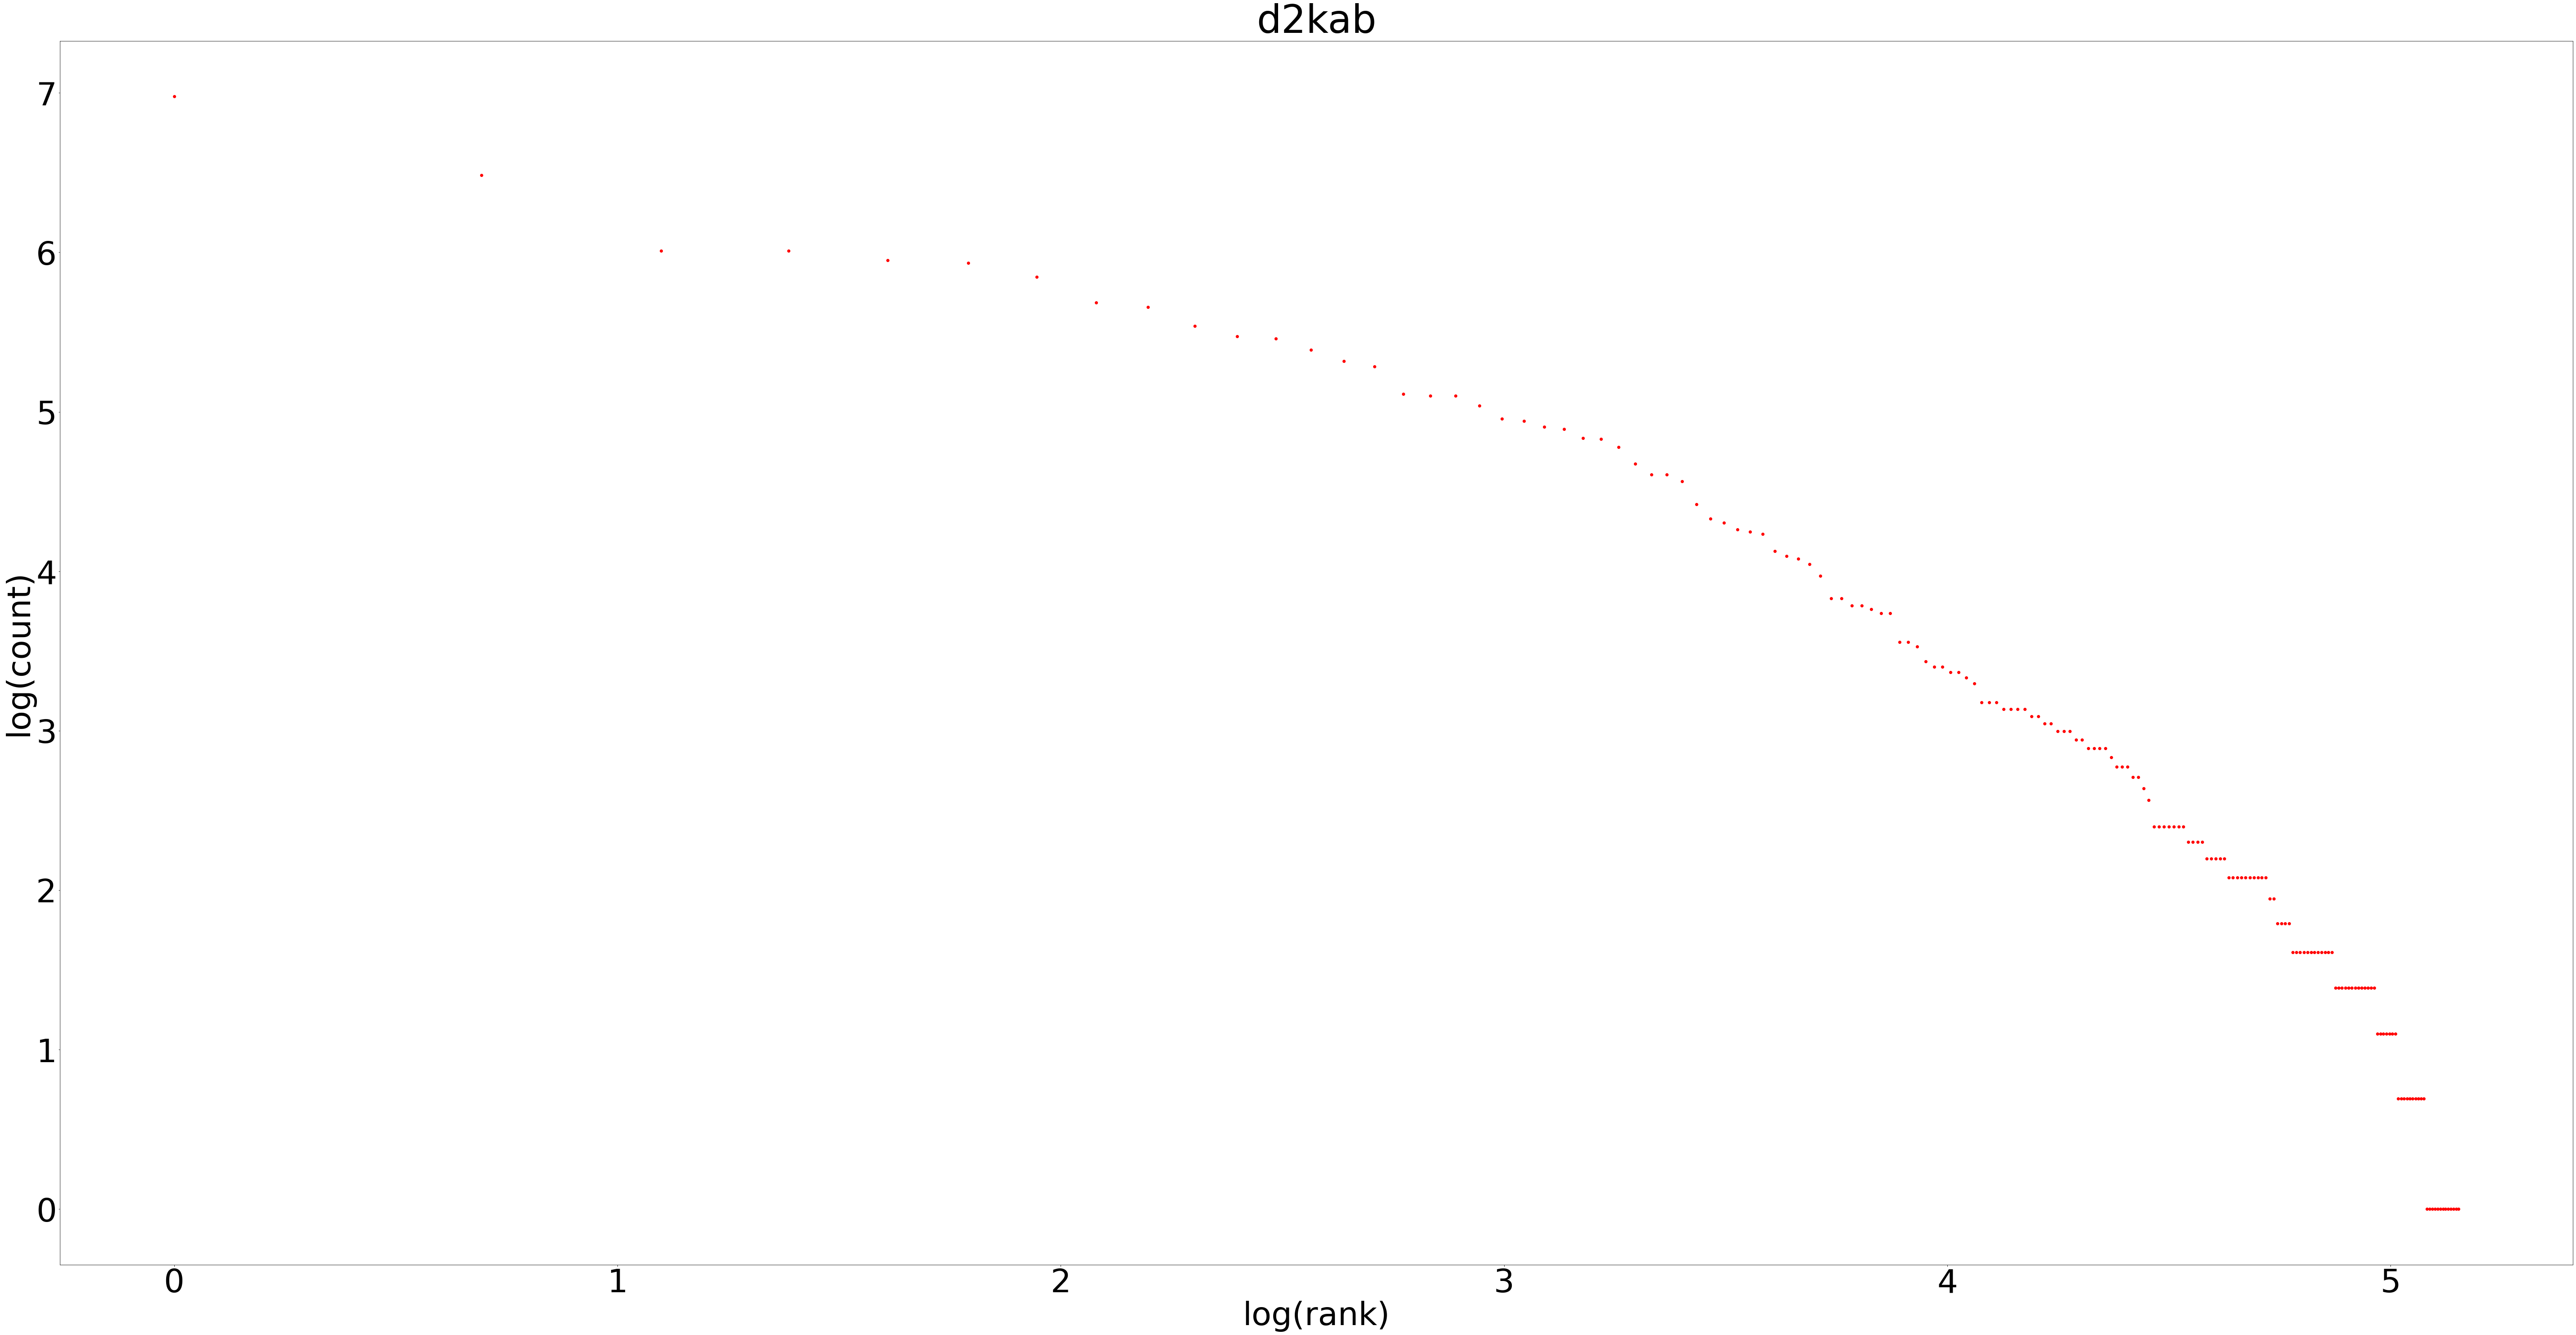

log-log r-squared for d2kab: 0.8833134170575224


In [9]:
# At the extreme right end of the plotted line, there are apparent steps, 
# which means that a lot of words have quite low occurences. 
# At the extreme left end, the line is quite flat, 
# which means the frequencies of the first few most frequent words are close that they do not drop as quickly as the ones ranking in the middle.
    
zipfFit(counts_d2kab, 'd2kab', toPlot=True, pr=True, ret=False)

### VESPA

In [10]:
vespa = pd.read_csv("../output/vespa/fcu/fcu_vespa.csv", delimiter="\t", encoding='utf-8')
vespa[:3]

bsv  type  length             context          word  \
0  01F57Zd3vFWg1itsp44SIT8E  html    4471            SOMMAIRE  Clémentinier   
1  01F57Zd3vFWg1itsp44SIT8E  html    4471  mentinier SOMMAIRE  Clémentinier   
2  01F57Zd3vFWg1itsp44SIT8E  html    4471  : Grossissement du         fruit   

           prefLabel            context.1 location  \
0       clémentinier   SOMMAIRE Clémentin    10-22   
1       clémentinier  Bulletin de Santé d    33-45   
2  culture fruitière  - Chute physiologiq  390-395   

                                            features  
0  type=GOL, uri=http://ontology.inrae.fr/frenchc...  
1  type=GOL, uri=http://ontology.inrae.fr/frenchc...  
2  type=GOL, uri=http://ontology.inrae.fr/frenchc...

In [11]:
vespa['prefLabel'].describe()

count                 14203
unique                  202
top       culture fruitière
freq                    762
Name: prefLabel, dtype: object

In [12]:
vespa['bsv'].describe()

count                  14203
unique                   445
top       BSV_legumes_11_002
freq                     448
Name: bsv, dtype: object

In [13]:
corpus_vespa = os.listdir("../resources/corpusVespa.html")
print("Corpus Vespa contient {} bsv en total".format(len(corpus_vespa)))

Corpus Vespa contient 497 bsv en total


In [14]:
counts_vespa = vespa['prefLabel'].value_counts()
dico_vespa = counts_vespa.to_dict()
dico_vespa

{'culture fruitière': 762,
 'pommier': 742,
 'colza': 696,
 'arboriculture fruitière': 561,
 'pois': 494,
 'blé': 394,
 'chou potager': 380,
 'chou': 380,
 'céréale': 354,
 'floriculture': 347,
 'poirier': 339,
 'zone non agricole': 335,
 'arboriculture': 333,
 'vigne': 314,
 'carotte': 305,
 'lin': 281,
 'maïs': 267,
 'culture légumière': 257,
 'oignon': 236,
 'poireau': 229,
 'féverole': 224,
 'pomme de terre': 205,
 'tournesol': 172,
 'betterave': 171,
 'céleri': 146,
 'oléagineux': 146,
 'salade': 145,
 'prunier': 143,
 'céréale à paille': 140,
 'tomate': 134,
 'horticulture ornementale': 130,
 'jardin': 127,
 'lin oléagineux': 125,
 'orge': 122,
 'noyer': 121,
 'protéagineux': 117,
 'pêcher': 116,
 'semence': 114,
 'fraisier': 111,
 'cerisier': 110,
 'châtaignier': 102,
 'rosier': 102,
 'blé tendre': 102,
 'pois protéagineux de printemps': 100,
 'poirée': 99,
 'persil': 96,
 'légume à graines ou à gousses': 91,
 'laitue': 78,
 'melon': 77,
 "pois protéagineux d'hiver": 66,
 'radis

In [15]:
features_vespa = list(dico_vespa.values()) 
true_labels_vespa = list(dico_vespa.keys())
freq_df_vespa = px.data.iris() # iris is a pandas DataFrame
fig = px.scatter(freq_df_vespa, x=true_labels_vespa, y=features_vespa)
fig.show()

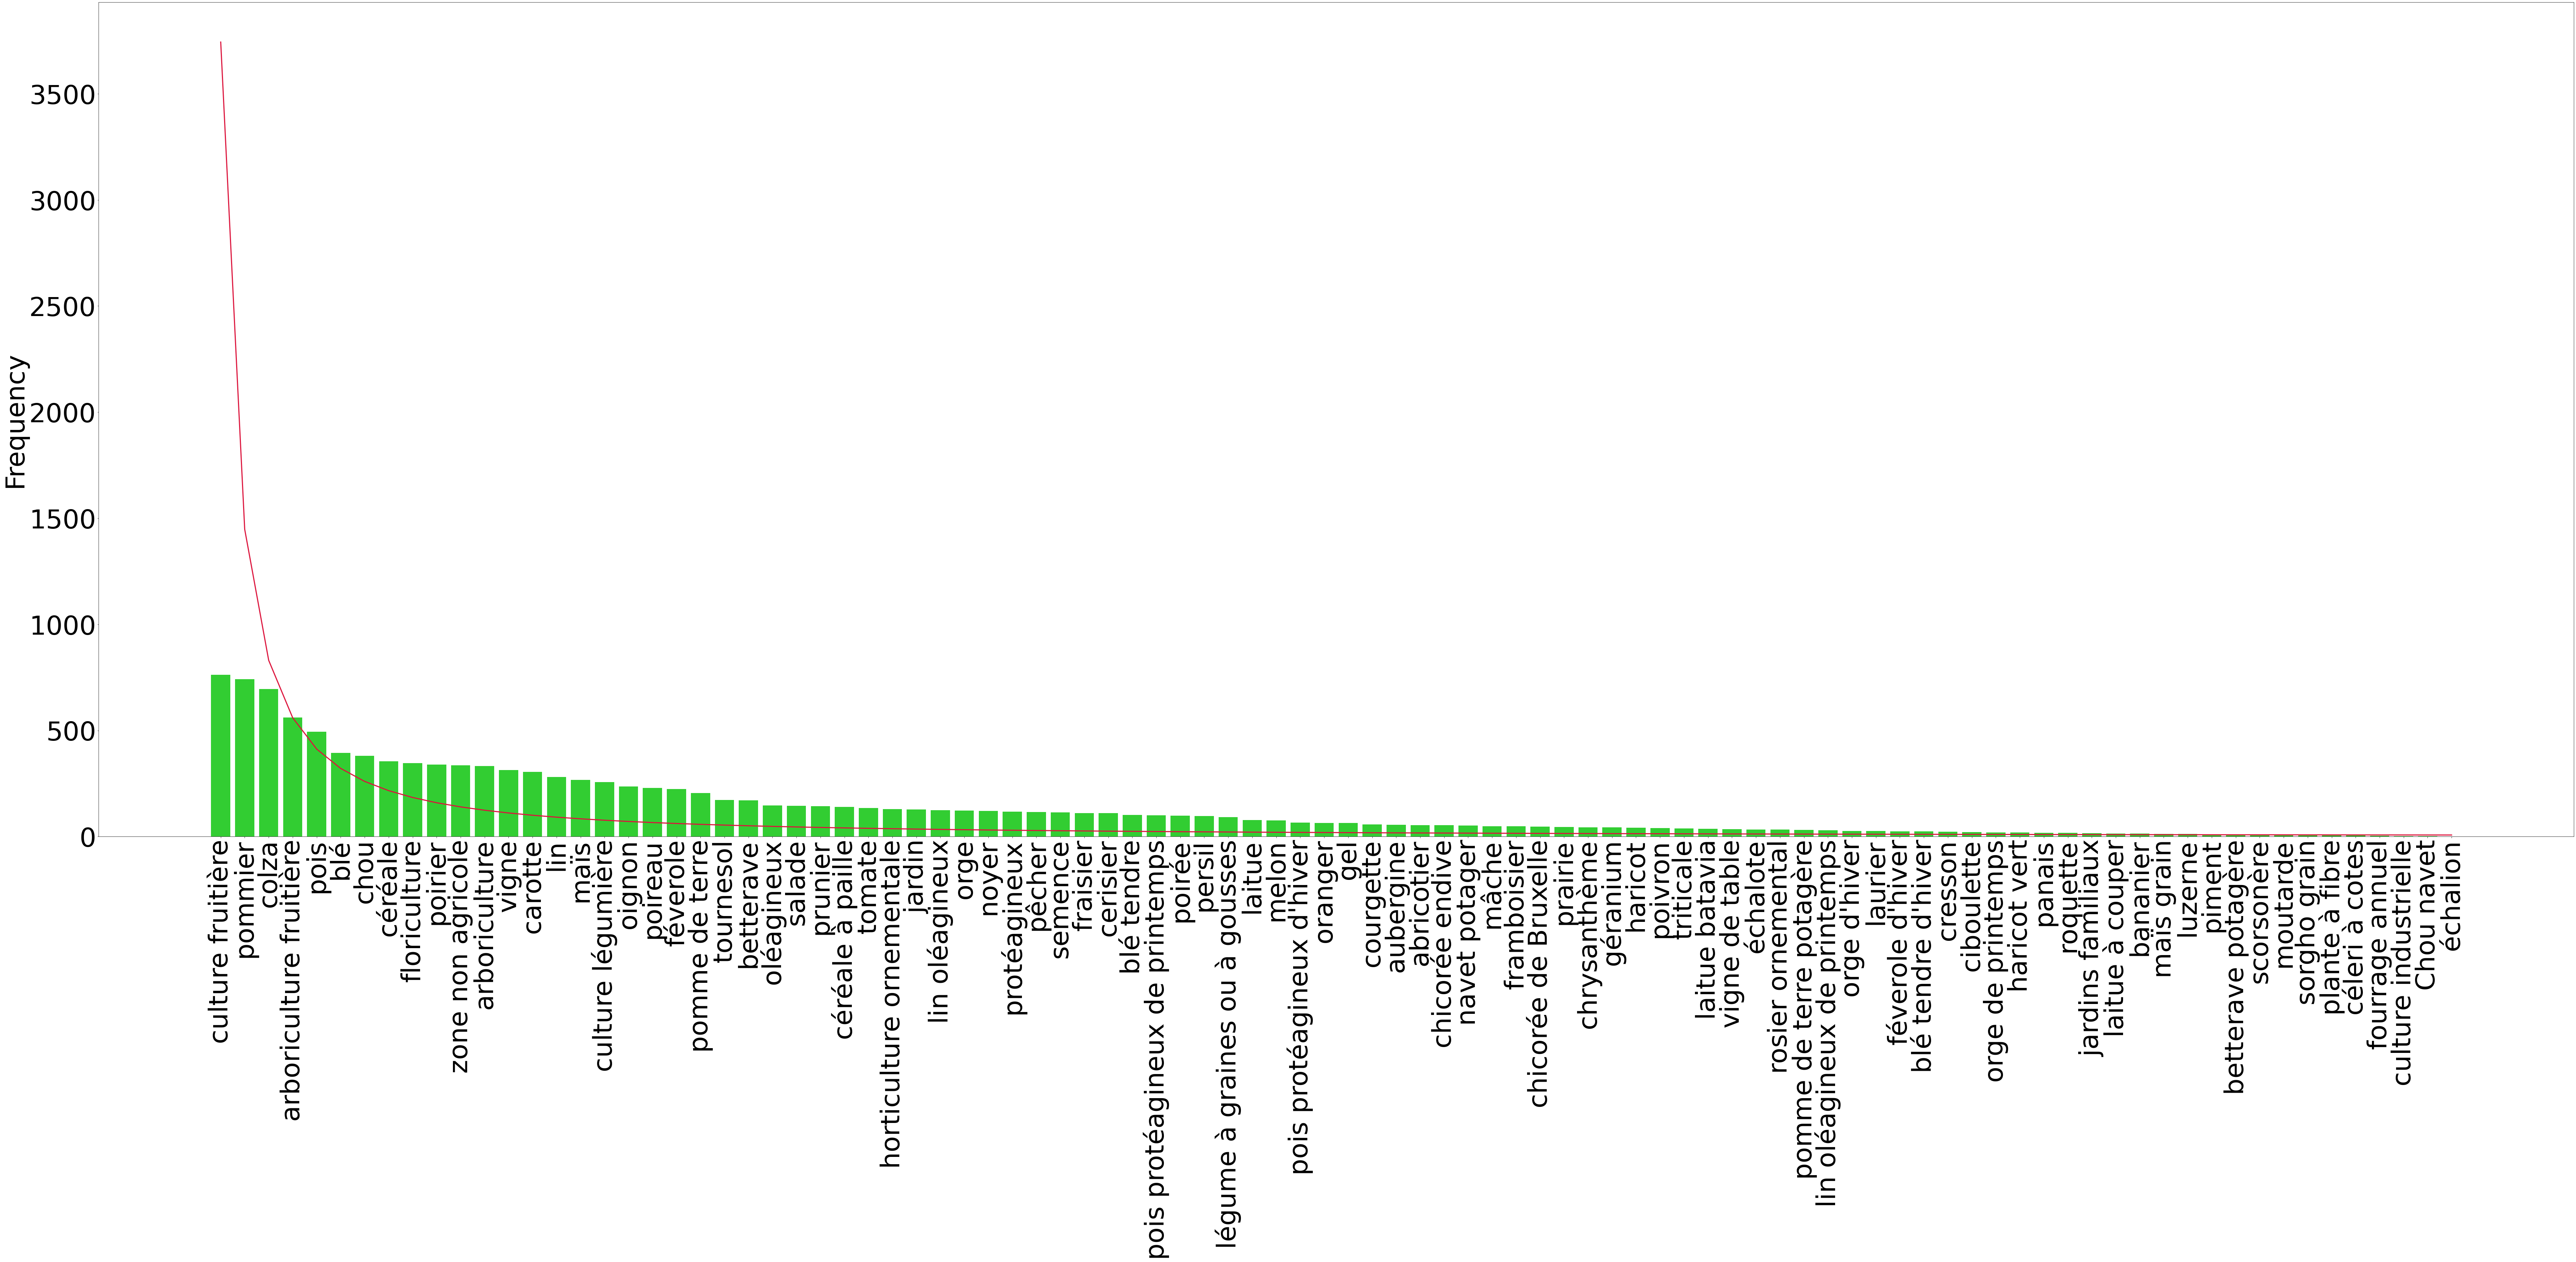

In [57]:
inv_map = {v: k for k, v in counts_vespa.items()}
lst = list(inv_map.items())

plt.bar([key for val, key in lst], [val for val, key in lst], color='limegreen')
alpha = 1.37065874
total = sum([p for p, c in lst])
plt.plot(range(len(lst)), [zipf.pmf(p, alpha) * total for p in range(1, len(lst) + 1)], color='crimson', lw=3)
plt.ylabel("Frequency")
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.rcParams["figure.figsize"] = (100,50)
plt.rcParams.update({'font.size': 72})
plt.show()

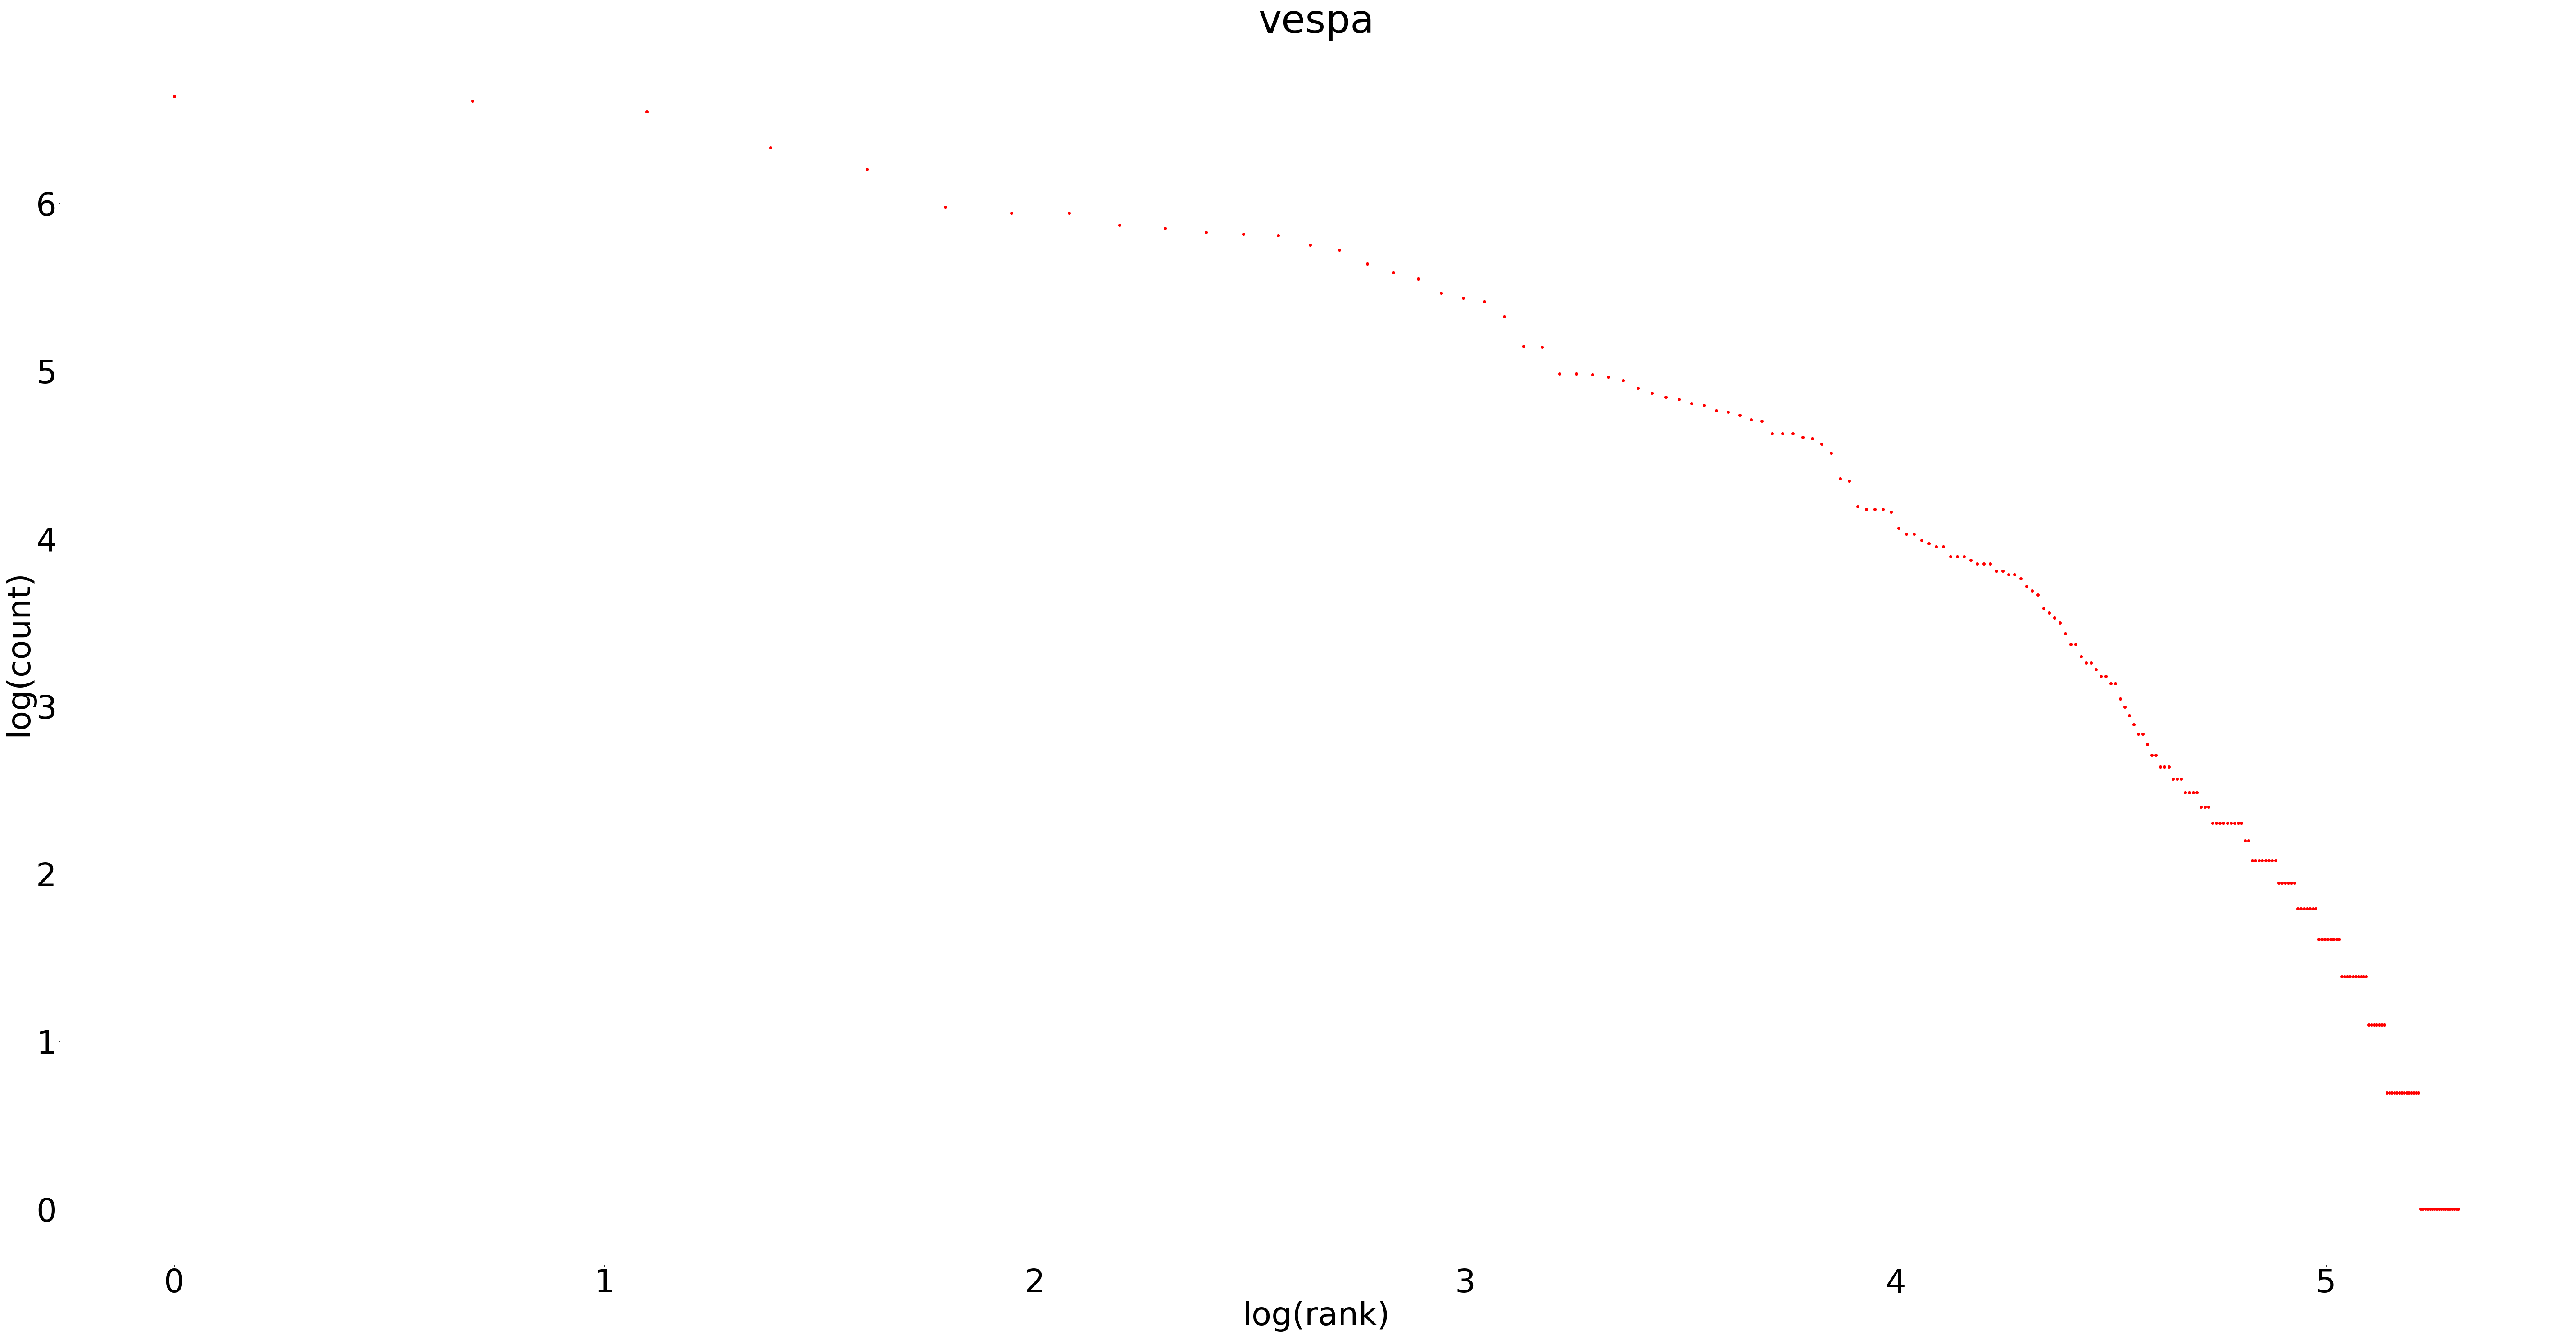

log-log r-squared for vespa: 0.8368002482168113


In [17]:
# At the extreme right end of the plotted line, there are apparent steps, 
# which means that a lot of words have quite low occurences. 
# At the extreme left end, the line is quite flat, 
# which means the frequencies of the first few most frequent words are close that they do not drop as quickly as the ones ranking in the middle.

    
zipfFit(counts_vespa, 'vespa', toPlot=True, pr=True, ret=False)

### D2KAB vs VESPA

In [18]:
# comparaison
freq_d2kab = pd.DataFrame({'prefLabel':counts_d2kab.index, 'd2kab':counts_d2kab.values})
freq_vespa = pd.DataFrame({'prefLabel':counts_vespa.index, 'vespa':counts_vespa.values})

In [19]:
freq_d2kab['prefLabel'].isin(freq_vespa['prefLabel']).value_counts()

True     158
False     15
Name: prefLabel, dtype: int64

In [20]:
freq_d2kab[~freq_d2kab['prefLabel'].isin(freq_vespa['prefLabel'])]

prefLabel  d2kab
65                      grande culture     22
71                         pois chiche     20
99                              cardon      9
106                              ricin      8
120                           pastèque      5
123                         potimarron      5
124  arboriculture fruitière tropicale      5
131                            basilic      4
133                            oseille      4
135                            potiron      4
137                            houblon      4
155                   courge butternut      2
162                   sorgho fourrager      1
164                    abricotier pays      1
167                      légume racine      1

### VESPA vs. D2KAB

In [21]:
freq_vespa['prefLabel'].isin(freq_d2kab['prefLabel']).value_counts()

True     158
False     44
Name: prefLabel, dtype: int64

In [22]:
freq_vespa[~freq_vespa['prefLabel'].isin(freq_d2kab['prefLabel'])]

prefLabel  vespa
68                  actinidia     45
71               chrysanthème     44
100                  cerfeuil     14
101                    seigle     14
108  pomme de terre féculière     12
114               groseillier     10
116    olivier fruit à noyaux     10
117                  photinie     10
119         bananier plantain     10
125                poinsettia      8
129             canne à sucre      8
133                 limettier      7
139              lin à fibres      6
140                    pomelo      6
142                  myrtille      6
143   arbre à fruits à coques      6
144            plante à fibre      6
148    arbre fruitier à noyau      5
151                    millet      5
156                cassissier      4
158               mandarinier      4
161                    tangor      4
163                   palmier      3
164         cerfeuil tubéreux      3
165                   gerbera      3
166                 calebasse      3
168               chou commun      3
169      culture industrielle      3
171                   lavande      2
179                  rhubarbe      2
180              christophine      2
183                Chou navet      2
186                   combava      1
187                  fenugrec      1
188                 chou vert      1
191        oranger du Mexique      1
192        betterave sucrière      1
193                   arroche      1
194    lin fibre de printemps      1
195                 chou-rave      1
196            laitue romaine      1
198                     brède      1
199        colza de printemps      1
201                  échalion      1

In [23]:
# joindre vocabulaires
result = pd.merge(freq_d2kab, freq_vespa, on="prefLabel")
result.sort_values(['d2kab', 'vespa'], ascending=[False, False], inplace=True)
result

prefLabel  d2kab  vespa
0                   vigne   1072    314
1                   colza    655    696
2                    chou    407    380
3            chou potager    407    380
4                     blé    384    394
..                    ...    ...    ...
157  laitue beurre pommée      1      4
149            cognassier      1      2
150         colza d'hiver      1      2
148               chanvre      1      1
151            chou frisé      1      1

[158 rows x 3 columns]

In [24]:
fig = px.bar(result, x="prefLabel", y=["d2kab", "vespa"], title="Term Frequency")
fig.update_layout(
    margin=dict(t=200, r=200, b=200, l=200),
    showlegend=False,
    width=1000, height=1500,
    autosize=False)

#fig.write_html("output/freq_d2kab_vespa.html")
fig.show()

In [25]:
fig = go.Figure()
fig.add_trace(go.Bar(
    y=result['prefLabel'],
    x=result['d2kab'],
    name='d2kab',
    orientation='h',
    marker=dict(
        color='rgba(246, 78, 139, 0.6)',
        line=dict(color='rgba(246, 78, 139, 1.0)', width=3)
    )
))
fig.add_trace(go.Bar(
    y=result['prefLabel'],
    x=result['vespa'],
    name='vespa',
    orientation='h',
    marker=dict(
        color='rgba(58, 71, 80, 0.6)',
        line=dict(color='rgba(58, 71, 80, 1.0)', width=3)
    )
))

fig.update_layout(barmode='stack',margin=dict(t=200, r=200, b=200, l=200),
    showlegend=False,
    width=1000, height=1500,
    autosize=False)

#fig.write_html("output/diff_d2kab_vespa3.html")
fig.show()

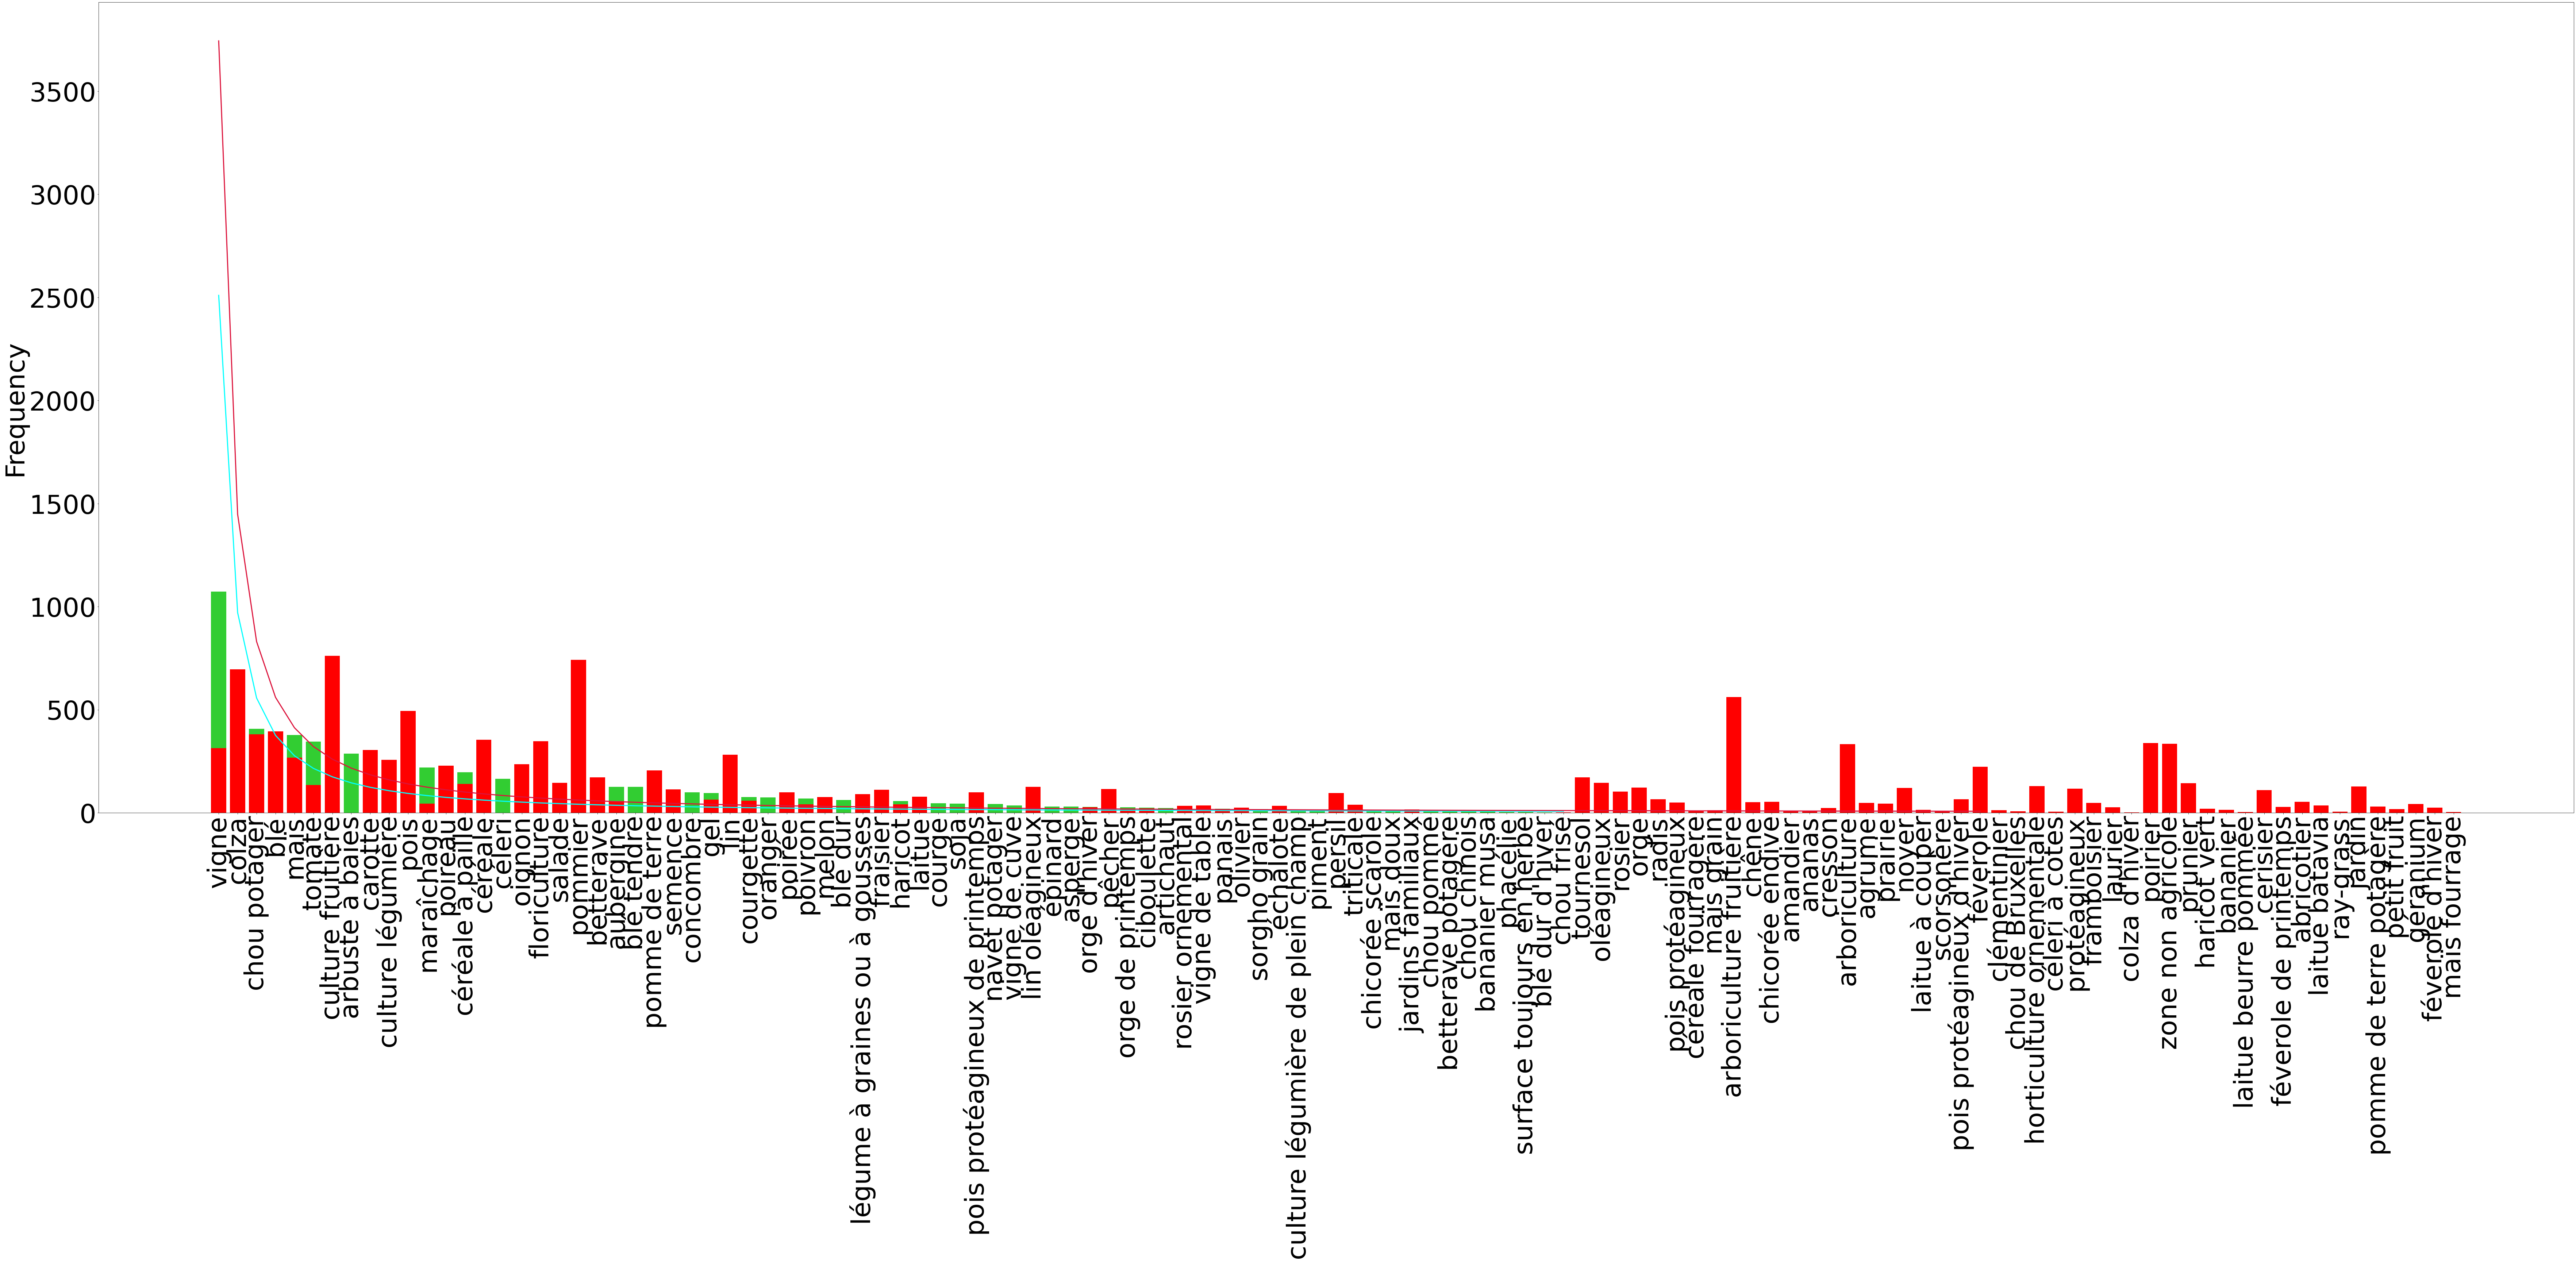

In [55]:
#inv_map1 = {v: k for k, v in counts_d2kab.items()}
alpha = 1.37065874
inv_map1 = dict(zip(result.d2kab, result.prefLabel))
lst1 = list(inv_map1.items())
plt.bar([key for val, key in lst1], [val for val, key in lst1], color='limegreen')
total1 = sum([p for p, c in lst1])
plt.plot(range(len(lst1)), [zipf.pmf(p, alpha) * total1 for p in range(1, len(lst1) + 1)], color='cyan', lw=3)



#inv_map2 = {v: k for k, v in counts_vespa.items()}
inv_map2 = dict(zip(result.vespa, result.prefLabel))
lst2 = list(inv_map2.items())
plt.bar([key for val, key in lst2], [val for val, key in lst2], color='red')
total2 = sum([p for p, c in lst2])
plt.plot(range(len(lst2)), [zipf.pmf(p, alpha) * total2 for p in range(1, len(lst2) + 1)], color='crimson', lw=3)

plt.ylabel("Frequency")
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.rcParams["figure.figsize"] = (100,50)
plt.rcParams.update({'font.size': 72})
plt.show()

### Difference entre la longueur des corpus

In [28]:
fcu_d2kab['length'].describe()

count     9883.000000
mean     23665.465749
std      14488.372799
min       2326.000000
25%      13961.000000
50%      20427.000000
75%      27149.000000
max      63638.000000
Name: length, dtype: float64

In [29]:
vespa['length'].describe()

count    14203.000000
mean     18486.009294
std      17607.209202
min       1135.000000
25%       7853.000000
50%      12884.000000
75%      20010.000000
max      79218.000000
Name: length, dtype: float64

## Score BM25

### D2KAB

In [30]:
gc = os.listdir("../resources/Corpus-v-12-04-21/train/CorpusTestD2kabGC.html")
maraichage = os.listdir("../resources/Corpus-v-12-04-21/train/CorpusTestD2kabMaraichage.html")
viticulture = os.listdir("../resources/Corpus-v-12-04-21/train/CorpusTestD2kabViti.html")
corpus_len = len(viticulture) + len(maraichage) + len(gc)

In [31]:
bm25_d2kab = pd.read_csv("../output/d2kab/scores/bm25_d2kab.csv", delimiter="\t", encoding='utf-8')
bm25_d2kab.columns = ['bsv', 'prefLabel', 'score']
bm25_bsv = bm25_d2kab['bsv'].tolist()
bm25_theme = []

for fic in bm25_bsv:
    fic = fic + ".html"
    if fic in gc:
        bm25_theme.append("GC")
    if fic in maraichage:
        bm25_theme.append("Maraichage")
    if fic in viticulture:
        bm25_theme.append("Viticulture")
        
bm25_d2kab['theme'] = bm25_theme
bm25_d2kab

bsv        prefLabel     score  \
0     20180911_bsv_grandes_cultures-26_cle0f15a8  fourrage annuel  6.506052   
1     20180911_bsv_grandes_cultures-26_cle0f15a8          prairie  5.220139   
2     20180911_bsv_grandes_cultures-26_cle0f15a8           pêcher  3.548339   
3     20180911_bsv_grandes_cultures-26_cle0f15a8             orge  2.607666   
4     20180911_bsv_grandes_cultures-26_cle0f15a8             maïs  2.594373   
...                                          ...              ...       ...   
2324  bsv_viti_mp_gaillac_n18_30072019_cle0fe8aa    vigne de cuve  2.767451   
2325  bsv_viti_mp_gaillac_n18_30072019_cle0fe8aa        tournesol  2.235800   
2326  bsv_viti_mp_gaillac_n18_30072019_cle0fe8aa  arbuste à baies  2.163973   
2327  bsv_viti_mp_gaillac_n18_30072019_cle0fe8aa          céréale  1.353002   
2328  bsv_viti_mp_gaillac_n18_30072019_cle0fe8aa            vigne  1.210913   

            theme  
0              GC  
1              GC  
2              GC  
3              GC  
4              GC  
...           ...  
2324  Viticulture  
2325  Viticulture  
2326  Viticulture  
2327  Viticulture  
2328  Viticulture  

[2329 rows x 4 columns]

In [32]:
bm25_d2kab['prefLabel'].describe()

count      2329
unique      173
top       vigne
freq         83
Name: prefLabel, dtype: object

In [33]:
bm25_d2kab.describe()

score
count  2329.000000
mean      3.136248
std       1.501080
min       0.259388
25%       2.107759
50%       2.840121
75%       3.903210
max      10.289402

In [34]:
fig = px.treemap(bm25_d2kab, path=['theme','prefLabel', 'score'])
fig.show()

In [35]:
fig = px.treemap(bm25_d2kab, path=['prefLabel', 'score'])
fig.show()

In [36]:
grouped = bm25_d2kab.groupby("theme")
for name,group in grouped:
    print(f"First 10 entries for {name!r}")
    print("------------------------")
    print(group.head(10), end="\n\n")

First 10 entries for 'GC'
------------------------
                                          bsv        prefLabel     score theme
0  20180911_bsv_grandes_cultures-26_cle0f15a8  fourrage annuel  6.506052    GC
1  20180911_bsv_grandes_cultures-26_cle0f15a8          prairie  5.220139    GC
2  20180911_bsv_grandes_cultures-26_cle0f15a8           pêcher  3.548339    GC
3  20180911_bsv_grandes_cultures-26_cle0f15a8             orge  2.607666    GC
4  20180911_bsv_grandes_cultures-26_cle0f15a8             maïs  2.594373    GC
5  20180911_bsv_grandes_cultures-26_cle0f15a8              blé  2.370605    GC
6  20180911_bsv_grandes_cultures-26_cle0f15a8              gel  2.321628    GC
7  20180911_bsv_grandes_cultures-26_cle0f15a8          semence  2.148009    GC
8  20180911_bsv_grandes_cultures-26_cle0f15a8        tournesol  2.057515    GC
9  20180911_bsv_grandes_cultures-26_cle0f15a8            colza  1.761567    GC

First 10 entries for 'Maraichage'
------------------------
                    

### VESPA

In [37]:
bm25vespa = pd.read_csv("../output/vespa/scores/bm25_vespa.csv", delimiter="\t", encoding='utf-8')
bm25vespa.columns = ['bsv', 'prefLabel', 'score']
bm25vespa

bsv                prefLabel  \
0                    01F57Zd3vFWg1itsp44SIT8E                   agrume   
1                    01F57Zd3vFWg1itsp44SIT8E                tournesol   
2                    01F57Zd3vFWg1itsp44SIT8E  arboriculture fruitière   
3                    01F57Zd3vFWg1itsp44SIT8E        culture fruitière   
4                   02_bsv_raisin_29032012_V3           vigne de table   
...                                       ...                      ...   
3649  pdf_BSV_no14_du_27_mai_2010_cle813bfb-1                  poireau   
3650  pdf_BSV_no14_du_27_mai_2010_cle813bfb-1                    colza   
3651  pdf_BSV_no14_du_27_mai_2010_cle813bfb-1                      blé   
3652  pdf_BSV_no14_du_27_mai_2010_cle813bfb-1                  pommier   
3653  pdf_BSV_no14_du_27_mai_2010_cle813bfb-1             floriculture   

         score  
0     7.512439  
1     3.454832  
2     2.486417  
3     2.334393  
4     9.543450  
...        ...  
3649  3.283843  
3650  2.349728  
3651  2.300259  
3652  1.890586  
3653  1.477686  

[3654 rows x 3 columns]

In [38]:
bm25vespa['prefLabel'].describe()

count             3654
unique             202
top       floriculture
freq               150
Name: prefLabel, dtype: object

In [39]:
bm25vespa.describe()

score
count  3654.000000
mean      4.190271
std       1.844594
min       0.245168
25%       2.866265
50%       3.934874
75%       5.357278
max      11.834891

In [40]:
fig = px.treemap(bm25vespa, path=['prefLabel', 'score'])
fig.show()

### Scores D2KAB vs VESPA

In [41]:
bm25_d2kab_mean = bm25_d2kab.groupby('prefLabel')['score'].agg([pd.np.mean])
bm25_vespa_mean = bm25vespa.groupby('prefLabel')['score'].agg([pd.np.mean])

<ipython-input-41-3077ffa3fd00>:1: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

<ipython-input-41-3077ffa3fd00>:2: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



In [42]:
result_mean = pd.merge(bm25_vespa_mean, bm25_d2kab_mean, on="prefLabel")
result_mean.columns = [ 'd2kab', 'vespa']
result_mean.sort_values(['d2kab', 'vespa'], ascending=[False, False], inplace=True)
result_mean

d2kab      vespa
prefLabel                             
manguier          11.834891   3.974859
engrais vert      11.021967   8.207840
artichaut         10.703011   6.018610
maïs doux         10.608399  10.235585
trèfle            10.488265   6.304129
...                     ...        ...
chou cabus rouge   2.594664   2.549346
colza              2.493468   1.579506
arboriculture      2.126588   3.277390
pommier            1.753482   2.945861
floriculture       1.414841   1.626265

[158 rows x 2 columns]

In [43]:
fig = px.bar(result_mean, x=result_mean.index, y=result_mean.columns, title='BM25')

fig.update_layout(
    margin=dict(t=200, r=200, b=200, l=200),
    showlegend=False,
    width=1000, height=1000,
    autosize=False, barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()

In [44]:
fig = px.line(result_mean, x=result_mean.index, y=result_mean.columns, title='BM25')
fig.show()

In [45]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=result_mean.index,
    y=result_mean['d2kab'],
    name='D2KAB',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=result_mean.index,
    y=result_mean['vespa'],
    name='Vespa',
    marker_color='lightsalmon'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45,
    margin=dict(t=200, r=200, b=200, l=200),
    showlegend=False,
    width=1500, height=1000,
    autosize=False)
fig.show()

In [46]:
fig = px.funnel(result_mean, x=result_mean.columns, y=result_mean.index)
fig.update_layout(
    margin=dict(t=200, r=200, b=200, l=200),
    showlegend=False,
    width=1000, height=1500,
    autosize=False)
fig.show()

In [47]:
# similarité des corpus
print(1 - cosine(result_mean["d2kab"], result_mean["vespa"]))

0.9397315625135553
